In [2]:
import os
import sys
import pandas as pd
import yfinance as yf
import plotly as px

import talib as ta
import matplotlib.pyplot as plt





In [4]:
# current working directory
current_dir=os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir=os.path.dirname(current_dir)
print(parent_dir)

# Insert the path to parent directory
sys.path.insert(0,parent_dir)

c:\Users\HP\Desktop\10 Acadamy\AIM Week 1\AIM-Week-1\AIM-WEEK-1\notebooks
c:\Users\HP\Desktop\10 Acadamy\AIM Week 1\AIM-Week-1\AIM-WEEK-1


In [5]:
#read and print stovk tickers
ap_data=pd.read_csv("../data/AAPL_historical_data.csv",parse_dates=["Date"])
# Ensure data has required columns
print(ap_data.head())
print(ap_data.info())

# Sorting the apple data by Date for consistency
ap_data = ap_data.sort_values(by="Date", ascending=True).reset_index(drop=True)

        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10998 non-null  datetime64[ns]
 1   Open          10998 non-null  float64       
 2   High          10998 non-null  float64       

In [6]:
# Simple Moving Averages (SMA) and Exponential Moving Averages (EMA)
ap_data['SMA_50'] = ta.SMA(ap_data['Close'], timeperiod=50)
ap_data['SMA_200'] = ta.SMA(ap_data['Close'], timeperiod=200)
ap_data['EMA_50'] = ta.EMA(ap_data['Close'], timeperiod=50)


In [7]:
# Calculate RSI (14-period)
ap_data['RSI_14'] = ta.RSI(ap_data['Close'], timeperiod=14)


In [8]:
# MACD calculation
ap_data['MACD'], ap_data['MACD_Signal'], ap_data['MACD_Hist'] = ta.MACD(
    ap_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)


In [9]:
import yfinance as yf

# Download historical data for AAPL (or another ticker)
ticker = "AAPL"
historical_data = yf.download(ticker, start="1980-12-12", end="2024-06-01")

# Display the last few rows
print(historical_data.tail())


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2024-05-24  189.551804  189.979996  190.580002  188.039993  188.820007   
2024-05-28  189.561783  189.990005  193.000000  189.100006  191.509995   
2024-05-29  189.861115  190.289993  192.250000  189.509995  189.610001   
2024-05-30  190.858856  191.289993  192.179993  190.630005  190.759995   
2024-05-31  191.816681  192.250000  192.570007  189.910004  191.440002   

Price         Volume  
Ticker          AAPL  
Date                  
2024-05-24  36294600  
2024-05-28  52280100  
2024-05-29  53068000  
2024-05-30  49947900  
2024-05-31  75158300  


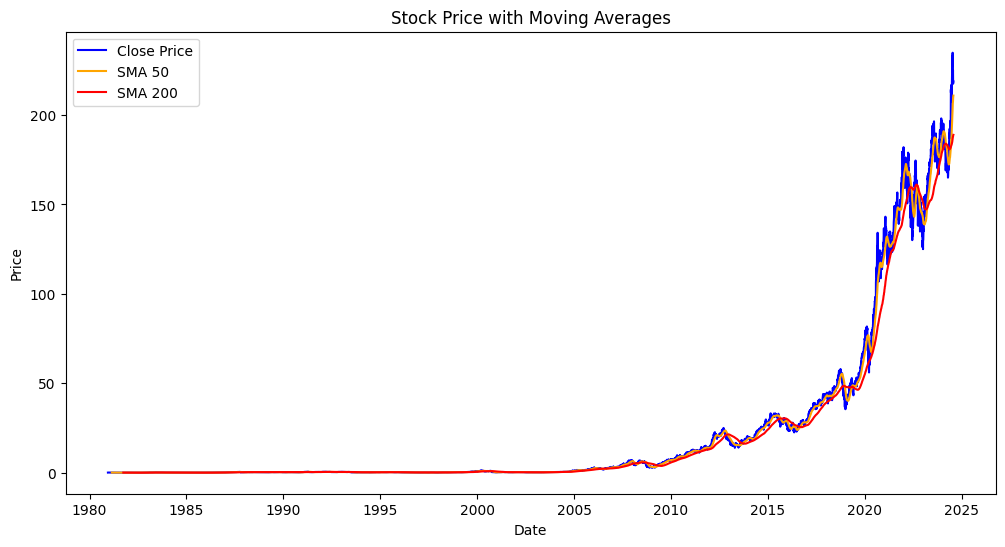

In [10]:
#Price Chart with SMA and EMA
plt.figure(figsize=(12, 6))
plt.plot(ap_data['Date'], ap_data['Close'], label="Close Price", color='blue')
plt.plot(ap_data['Date'], ap_data['SMA_50'], label="SMA 50", color='orange')
plt.plot(ap_data['Date'], ap_data['SMA_200'], label="SMA 200", color='red')
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


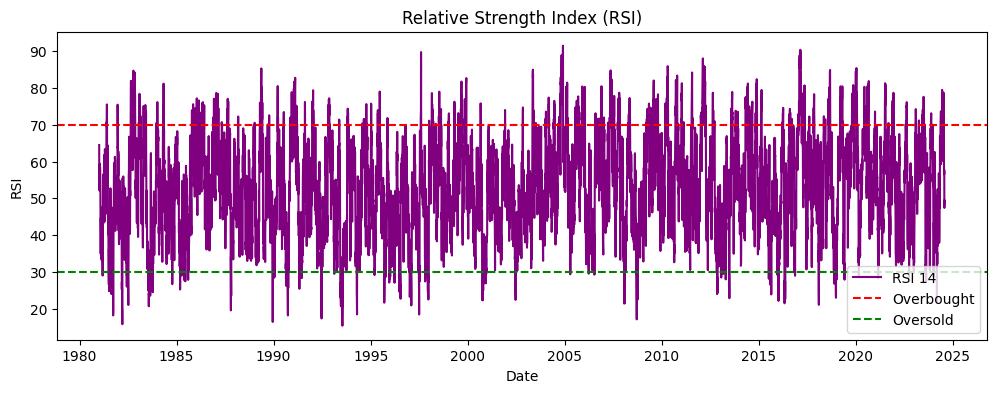

In [11]:
#RSI Visualization
plt.figure(figsize=(12, 4))
plt.plot(ap_data['Date'], ap_data['RSI_14'], label="RSI 14", color='purple')
plt.axhline(70, color='red', linestyle='--', label="Overbought")
plt.axhline(30, color='green', linestyle='--', label="Oversold")
plt.title("Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.show()


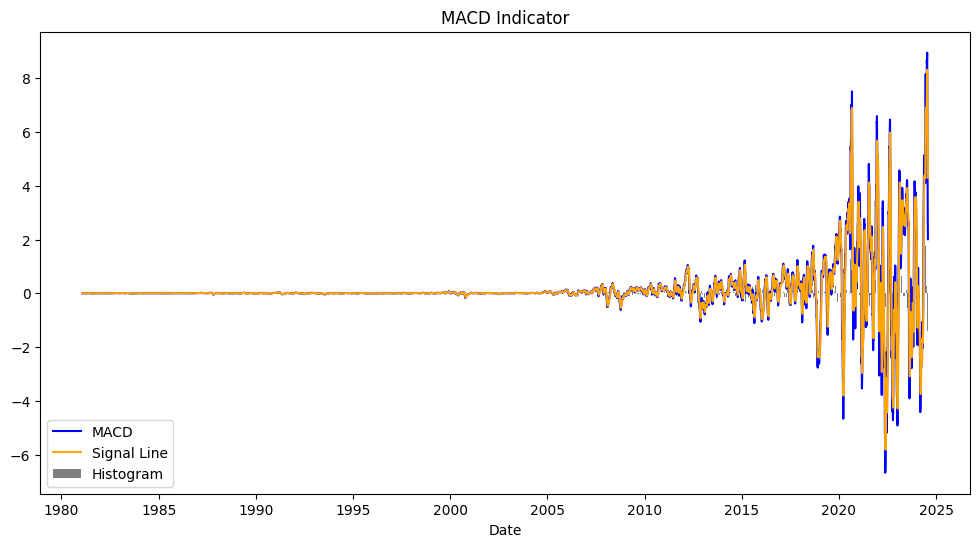

In [12]:
#MACD Visualization
plt.figure(figsize=(12, 6))
plt.plot(ap_data['Date'], ap_data['MACD'], label="MACD", color='blue')
plt.plot(ap_data['Date'], ap_data['MACD_Signal'], label="Signal Line", color='orange')
plt.bar(ap_data['Date'], ap_data['MACD_Hist'], label="Histogram", color='gray')
plt.title("MACD Indicator")
plt.xlabel("Date")
plt.legend()
plt.show()


In [13]:
#read and print stovk tickers
am_data=pd.read_csv("../data/AMZN_historical_data.csv",parse_dates=["Date"])
# Ensure data has required columns
print(am_data.head())
print(am_data.info())

# Sorting the apple data by Date for consistency
am_data = am_data.sort_values(by="Date", ascending=True).reset_index(drop=True)


        Date      Open      High       Low     Close  Adj Close      Volume  \
0 1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1 1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2 1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3 1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4 1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6846 non-null   datetime64[ns]
 1   Open          6846 non-null   float64       
 2   High          6846 non-null   float64   

In [14]:
# Simple Moving Averages (SMA) and Exponential Moving Averages (EMA)
am_data['SMA_50'] = ta.SMA(am_data['Close'], timeperiod=50)
am_data['SMA_200'] = ta.SMA(am_data['Close'], timeperiod=200)
am_data['EMA_50'] = ta.EMA(am_data['Close'], timeperiod=50)

In [16]:
# Calculate RSI (14-period)
am_data['RSI_14'] = ta.RSI(ap_data['Close'], timeperiod=14)

In [17]:
# MACD calculation
am_data['MACD'], am_data['MACD_Signal'], am_data['MACD_Hist'] = ta.MACD(
    am_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [18]:
import yfinance as yf

# Download historical data for AMZN (or another ticker)
ticker = "AMZN"
historical_data = yf.download(ticker, start="1980-12-12", end="2024-06-01")

# Display the last few rows
print(historical_data.tail())

[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AMZN        AMZN        AMZN        AMZN        AMZN   
Date                                                                     
2024-05-24  180.750000  180.750000  182.440002  180.300003  181.649994   
2024-05-28  182.149994  182.149994  182.240005  179.490005  179.929993   
2024-05-29  182.020004  182.020004  184.080002  181.550003  181.699997   
2024-05-30  179.320007  179.320007  181.339996  178.360001  181.309998   
2024-05-31  176.440002  176.440002  179.210007  173.869995  178.300003   

Price         Volume  
Ticker          AMZN  
Date                  
2024-05-24  27434100  
2024-05-28  29927000  
2024-05-29  32009300  
2024-05-30  29249200  
2024-05-31  58903900  


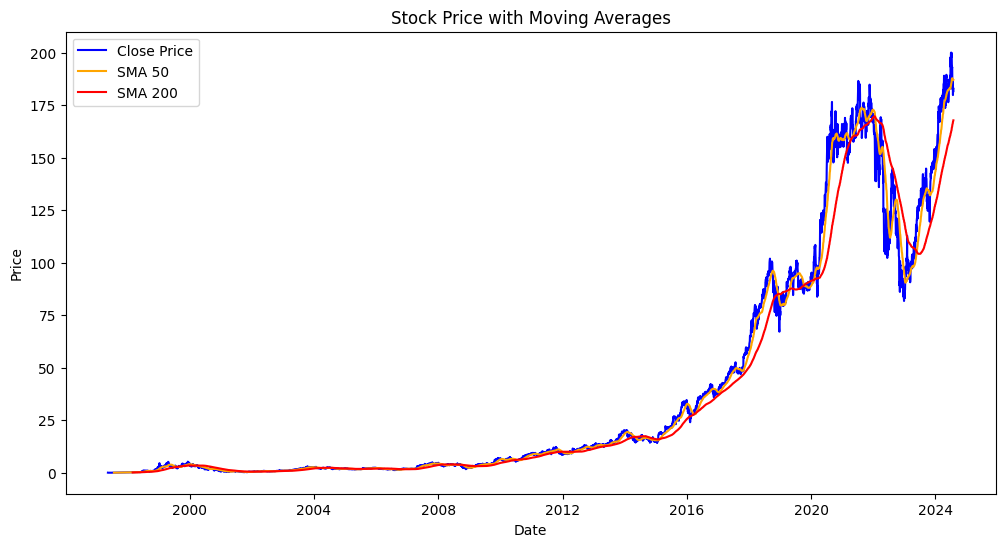

In [19]:
#Price Chart with SMA and EMA
plt.figure(figsize=(12, 6))
plt.plot(am_data['Date'], am_data['Close'], label="Close Price", color='blue')
plt.plot(am_data['Date'], am_data['SMA_50'], label="SMA 50", color='orange')
plt.plot(am_data['Date'], am_data['SMA_200'], label="SMA 200", color='red')
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


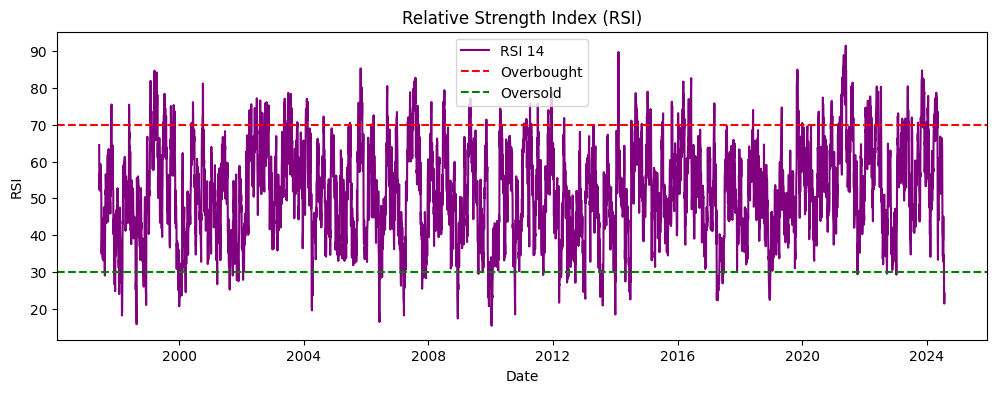

In [20]:
#RSI Visualization
plt.figure(figsize=(12, 4))
plt.plot(am_data['Date'], am_data['RSI_14'], label="RSI 14", color='purple')
plt.axhline(70, color='red', linestyle='--', label="Overbought")
plt.axhline(30, color='green', linestyle='--', label="Oversold")
plt.title("Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.show()

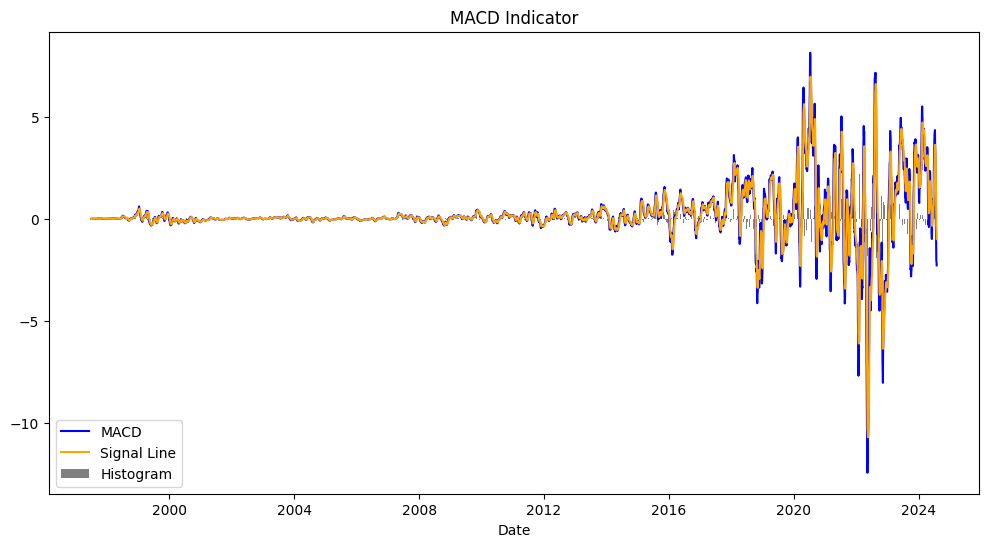

In [21]:
#MACD Visualization
plt.figure(figsize=(12, 6))
plt.plot(am_data['Date'], am_data['MACD'], label="MACD", color='blue')
plt.plot(am_data['Date'], am_data['MACD_Signal'], label="Signal Line", color='orange')
plt.bar(am_data['Date'], am_data['MACD_Hist'], label="Histogram", color='gray')
plt.title("MACD Indicator")
plt.xlabel("Date")
plt.legend()
plt.show()

In [22]:
#read and print stovk tickers
go_data=pd.read_csv("../data/GOOG_historical_data.csv",parse_dates=["Date"])
# Ensure data has required columns
print(go_data.head())
print(go_data.info())

# Sorting the apple data by Date for consistency
go_data = go_data.sort_values(by="Date", ascending=True).reset_index(drop=True)

        Date      Open      High       Low     Close  Adj Close     Volume  \
0 2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
1 2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2 2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
3 2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
4 2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5020 non-null   datetime64[ns]
 1   Open          5020 non-null   float64       
 2   High          5020 non-null   float64       
 

In [23]:
# Simple Moving Averages (SMA) and Exponential Moving Averages (EMA)
go_data['SMA_50'] = ta.SMA(go_data['Close'], timeperiod=50)
go_data['SMA_200'] = ta.SMA(go_data['Close'], timeperiod=200)
go_data['EMA_50'] = ta.EMA(go_data['Close'], timeperiod=50)

In [24]:
# Calculate RSI (14-period)
go_data['RSI_14'] = ta.RSI(go_data['Close'], timeperiod=14)

In [25]:
# MACD calculation
go_data['MACD'], go_data['MACD_Signal'], go_data['MACD_Hist'] = ta.MACD(
    go_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [26]:
import yfinance as yf

# Download historical data for AMZN (or another ticker)
ticker = "GOOG"
historical_data = yf.download(ticker, start="1980-12-12", end="2024-06-01")

# Display the last few rows
print(historical_data.tail())

[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            GOOG        GOOG        GOOG        GOOG        GOOG   
Date                                                                     
2024-05-24  175.698700  176.330002  177.304001  175.199997  176.520004   
2024-05-28  177.382645  178.020004  178.509995  175.679993  175.740005   
2024-05-29  176.764862  177.399994  178.229996  176.259995  176.809998   
2024-05-30  172.938614  173.559998  176.690002  173.229996  176.690002   
2024-05-31  173.337173  173.960007  174.419998  170.970001  173.399994   

Price         Volume  
Ticker          GOOG  
Date                  
2024-05-24  11400600  
2024-05-28  15655300  
2024-05-29  15023800  
2024-05-30  18844000  
2024-05-31  28085200  


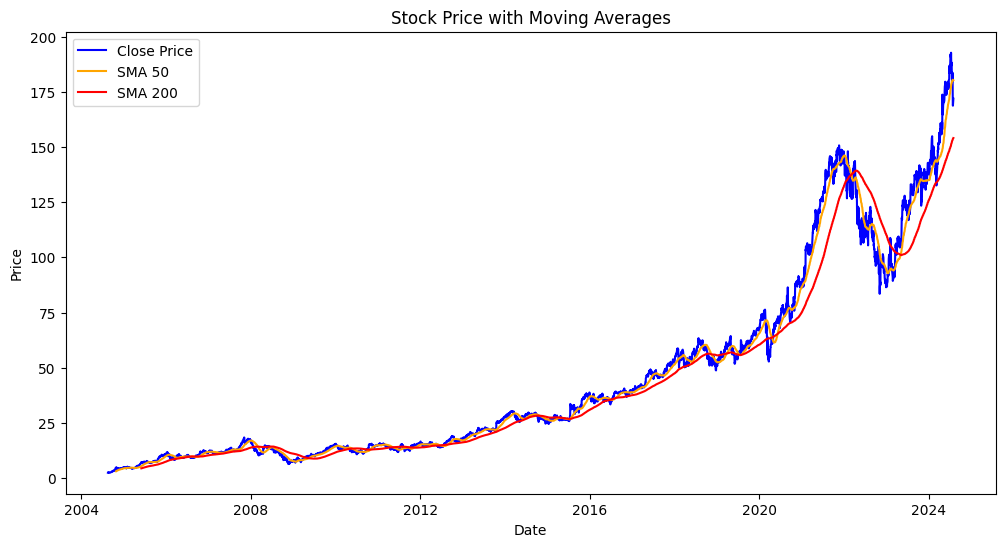

In [27]:
#Price Chart with SMA and EMA
plt.figure(figsize=(12, 6))
plt.plot(go_data['Date'], go_data['Close'], label="Close Price", color='blue')
plt.plot(go_data['Date'], go_data['SMA_50'], label="SMA 50", color='orange')
plt.plot(go_data['Date'], go_data['SMA_200'], label="SMA 200", color='red')
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

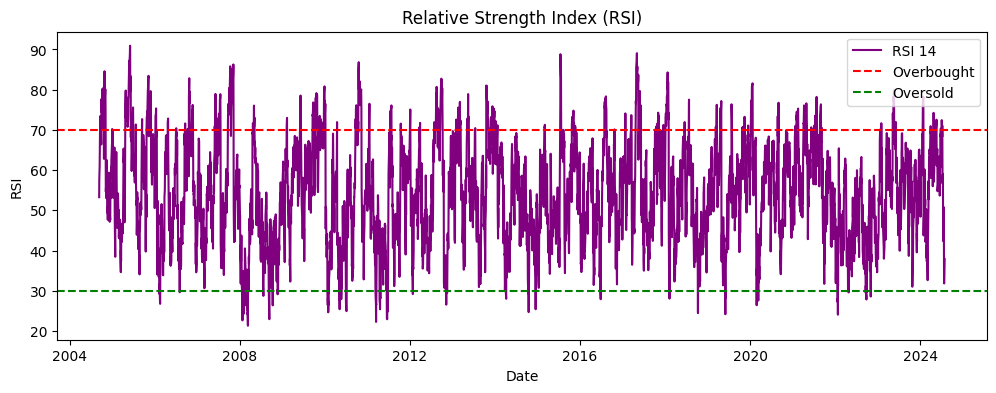

In [28]:
#RSI Visualization
plt.figure(figsize=(12, 4))
plt.plot(go_data['Date'], go_data['RSI_14'], label="RSI 14", color='purple')
plt.axhline(70, color='red', linestyle='--', label="Overbought")
plt.axhline(30, color='green', linestyle='--', label="Oversold")
plt.title("Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.show()

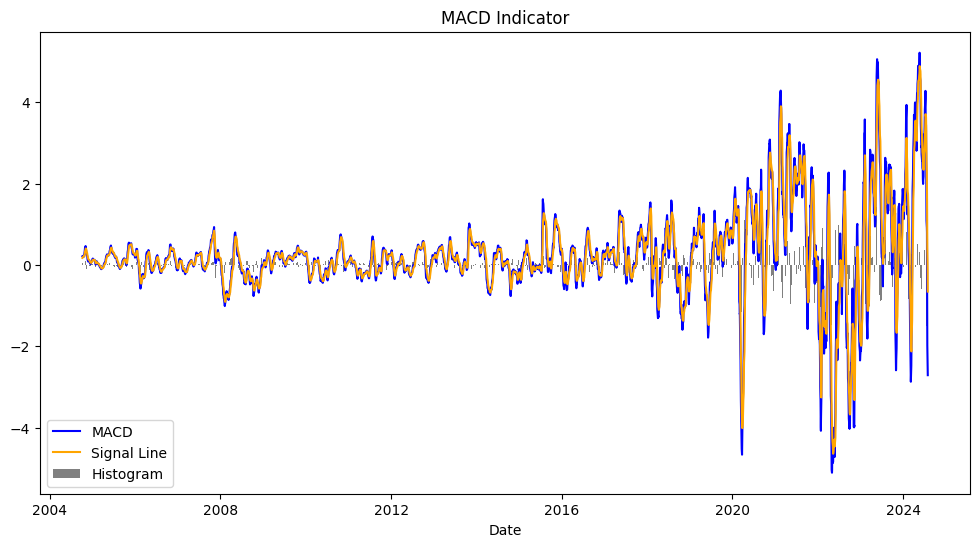

In [29]:
#MACD Visualization
plt.figure(figsize=(12, 6))
plt.plot(go_data['Date'], go_data['MACD'], label="MACD", color='blue')
plt.plot(go_data['Date'], go_data['MACD_Signal'], label="Signal Line", color='orange')
plt.bar(go_data['Date'], go_data['MACD_Hist'], label="Histogram", color='gray')
plt.title("MACD Indicator")
plt.xlabel("Date")
plt.legend()
plt.show()